# DBSCAN for non spherical data

Generate the data, scale it and train the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_pred = dbscan.fit_predict(X)

Visualize the clusters

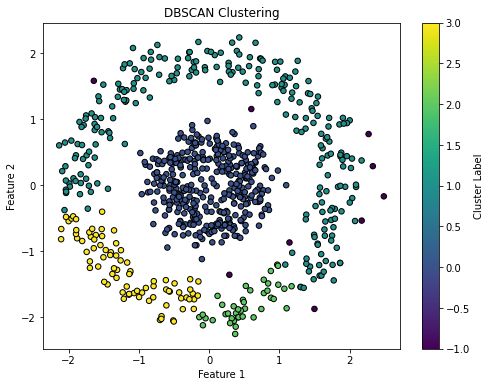

In [2]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

Evaluate the model

In [3]:
# Evaluation metrics
num_clusters = len(set(y_pred[np.where(y_pred != -1)]))
print('Number of clusters: {}'.format(num_clusters))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, y_pred))
if num_clusters > 1:  # Silhouette score is not defined for a single cluster
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_pred))
else:
    print("Silhouette Coefficient: Not applicable (only one cluster)")

Number of clusters: 4
Homogeneity: 1.0
Completeness: 0.5953735537230335
V-measure: 0.746
Adjusted Rand Index: 0.741
Adjusted Mutual Information: 0.746
Silhouette Coefficient: 0.264
